# Аналитика в авиакомпании

## Описание проекта
Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

## Описание данных
    Первый датасет:
        - model — модели самолета
        - flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
        
    Второй датасет:
        - city — городах
        - average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

## План выполнения
1. [импортировали файлы](#step_1); <a id='step_1'></a>
2. [изучили данные в них](#step_2);
3. [проверили типы данных на корректность](#step_3);
4. [выбрали топ-10 городов по количеству рейсов](#step_4);
5. [построили графики](#step_5): 
    - модели самолетов и количество рейсов, 
    - города и количество рейсов, 
    - топ-10 городов и количество рейсов;
6. [общий вывод](#step_6).

In [1]:
# импорт неообходимых библиотек
import pandas as pd 
import matplotlib.pyplot as plt

### Импорт Файлов
<a id='step_1'></a>

In [2]:
df_models = pd.read_csv('/datasets/query_1.csv')
df_city = pd.read_csv('/datasets/query_3.csv')

### Изучение данных
<a id='step_2'></a>

In [3]:
df_models.info()
df_models.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


Таблица состоит из 2-х столбцов с 8-ю ненулевыми строками. Типы данных соответствуют значениям в столбцах. 

In [4]:
df_city.info()
df_city.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Таблица состоит из 2-х столбцов и 101 строки, без пропущенных значений. Столбец 'average_flights' не соответсвует по типу данных - полёты должны иметь дискретный тип даннызх int.

### Изменение типов данных
<a id='step_3'></a>

In [5]:
df_city['average_flights'] = df_city['average_flights'].astype('int')
df_city.head()

,city,average_flights
0,Абакан,3
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


Данные в столбце 'average_flights' при изменении типа округлились в меньшую сторону.

### Топ-10 городов по количеству прилётов
<a id='step_4'></a>

In [6]:
df_city_top_10 = df_city.sort_values(by = 'average_flights', ascending = False).head(10)
df_city_top_10

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


Отсортировали таблицу прилётов в города по убыванию полётов. В топ-10 вошли обе столицы России, города-миллионники и крупные областные центры.

### Построение графиков
<a id='step_5'></a>

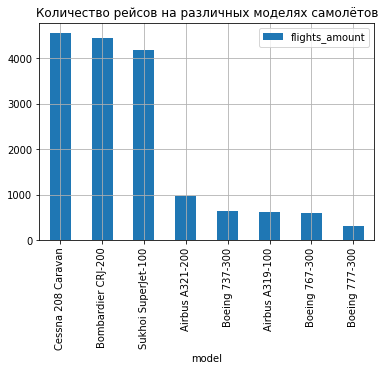

In [7]:
df_models.sort_values(by = 'flights_amount', ascending = False)\
                    .plot( x = 'model', y = 'flights_amount', kind = 'bar',
                    title='Количество рейсов на различных моделях самолётов', grid=True)
plt.show()

Cessna 208 - небольшой самолёт вместимостью до 13 человек. Скорее всего совершает частные рейсы, поэтому он лидер по количеству полётов. Произведено более 1500 единиц.

Bombardier CRJ200 - также небольшой самолёт вместимостью до 50 человек. Вероятно, совершает также частные или региональные рейсы на небольшие расстояния. Произведено более 1000 единиц.

Sukhoi Superjet 100 - отечественный самолёт вместимостью до 100 человек. Эксплуатируется российскими авиалиниями и странами бывшего СНГ. Совершает региональные перелёты, поэтому является одним из лидеров по количеству перелётов в месяц.

Отсальные самолёты моеделей Boeing и Airbus большей вместимости(200-300), поэтому перелётов они совершают меньше. Летают на большие расстояния, часто имеют также и международные перелёты.

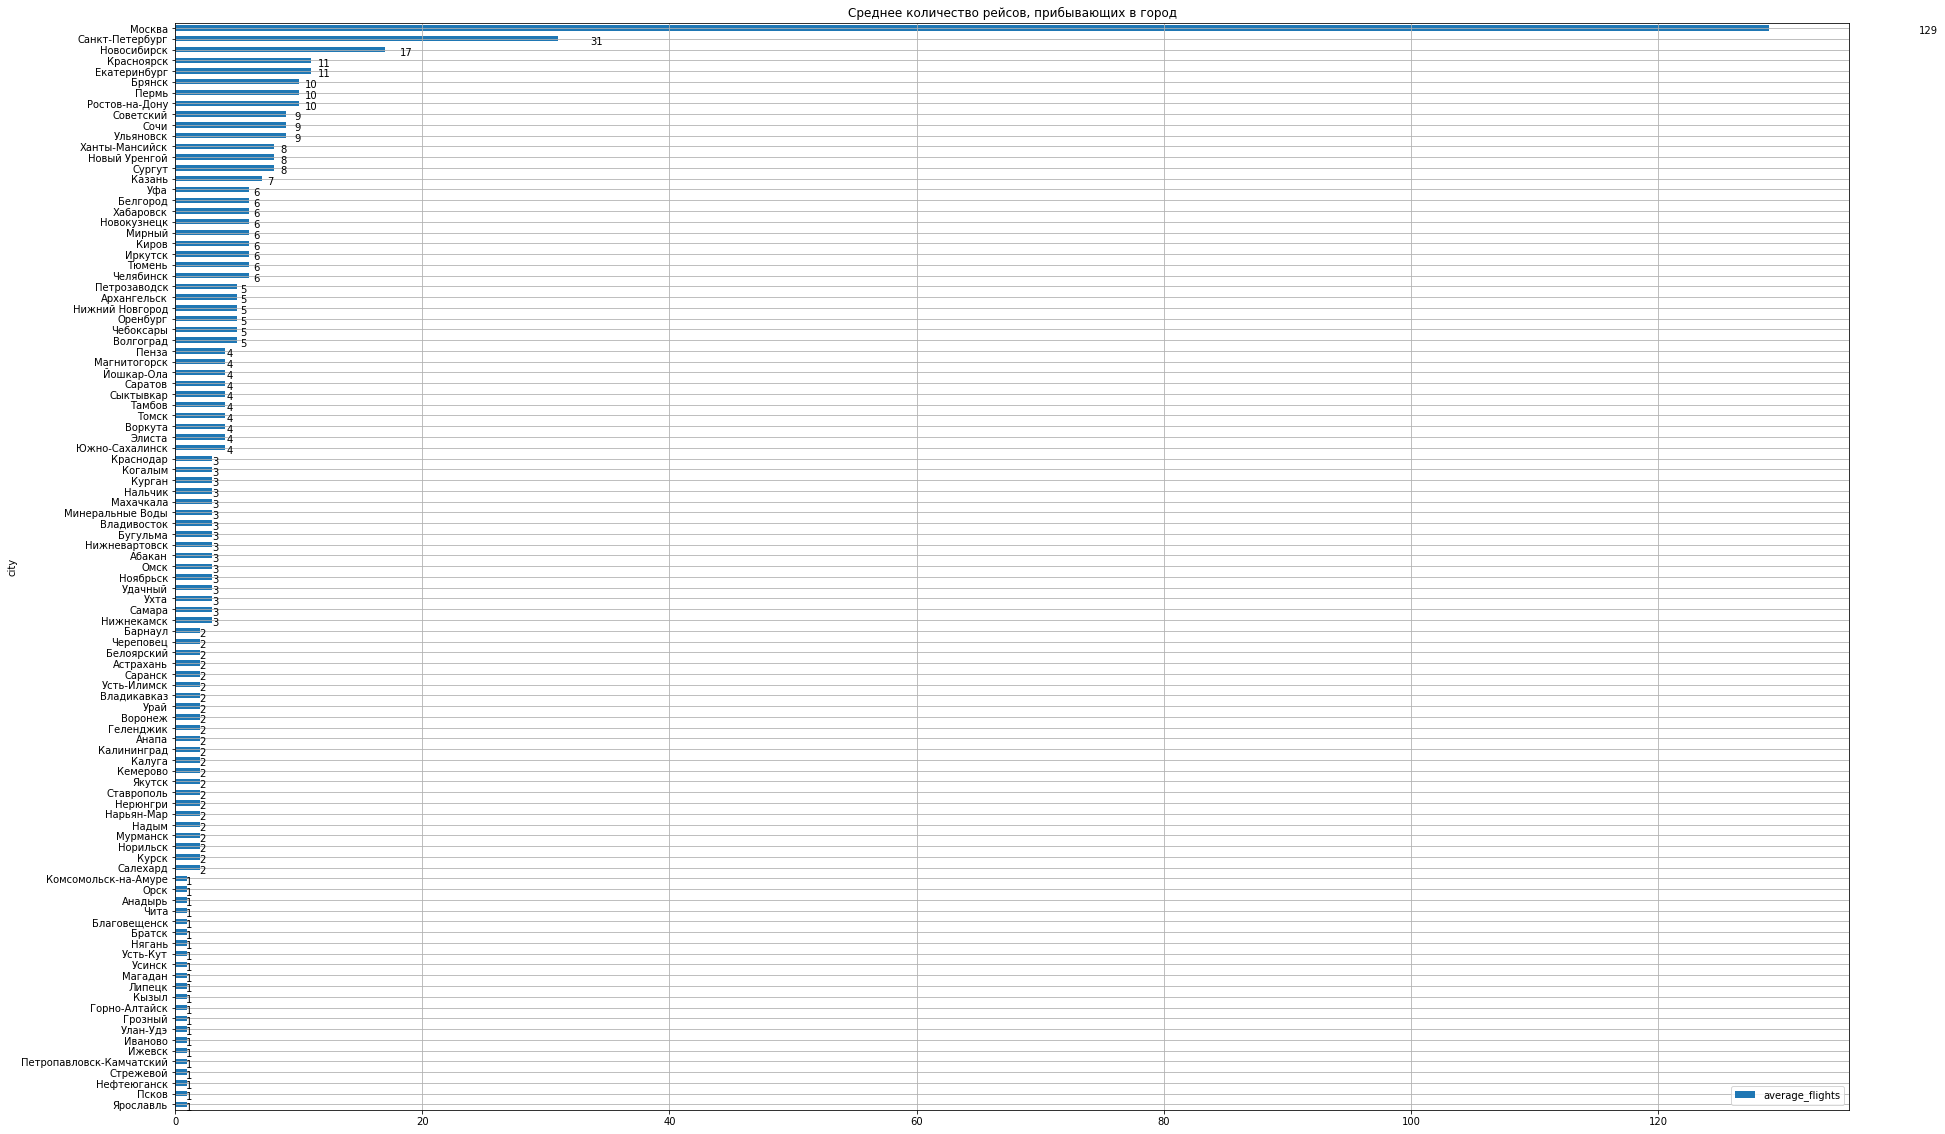

In [8]:
plot_city = df_city.sort_values(by = 'average_flights', ascending = True)\
                    .plot.barh( x = 'city', y = 'average_flights',figsize = (30,20),
                    title='Среднее количество рейсов, прибывающих в город', grid=True)
for rect in plot_city.patches:
       plot_city.text(rect.get_width()*1.1, rect.get_y(), rect.get_width(), ha='center', va='center') 

plt.show()

Москва - столица России, сюда чаще всего прилетают самолёты, так как это транзитный пункт для перелётов по стране. 

На втором месте Санкт-Петербург, который является вторым городом по населённости. Может быть также транзитом для северных перелётов или поездок в Европу.

Далее количество прилётов в города уменьшается в зависимости от размеров городов, их статуса(областные центры или нет).

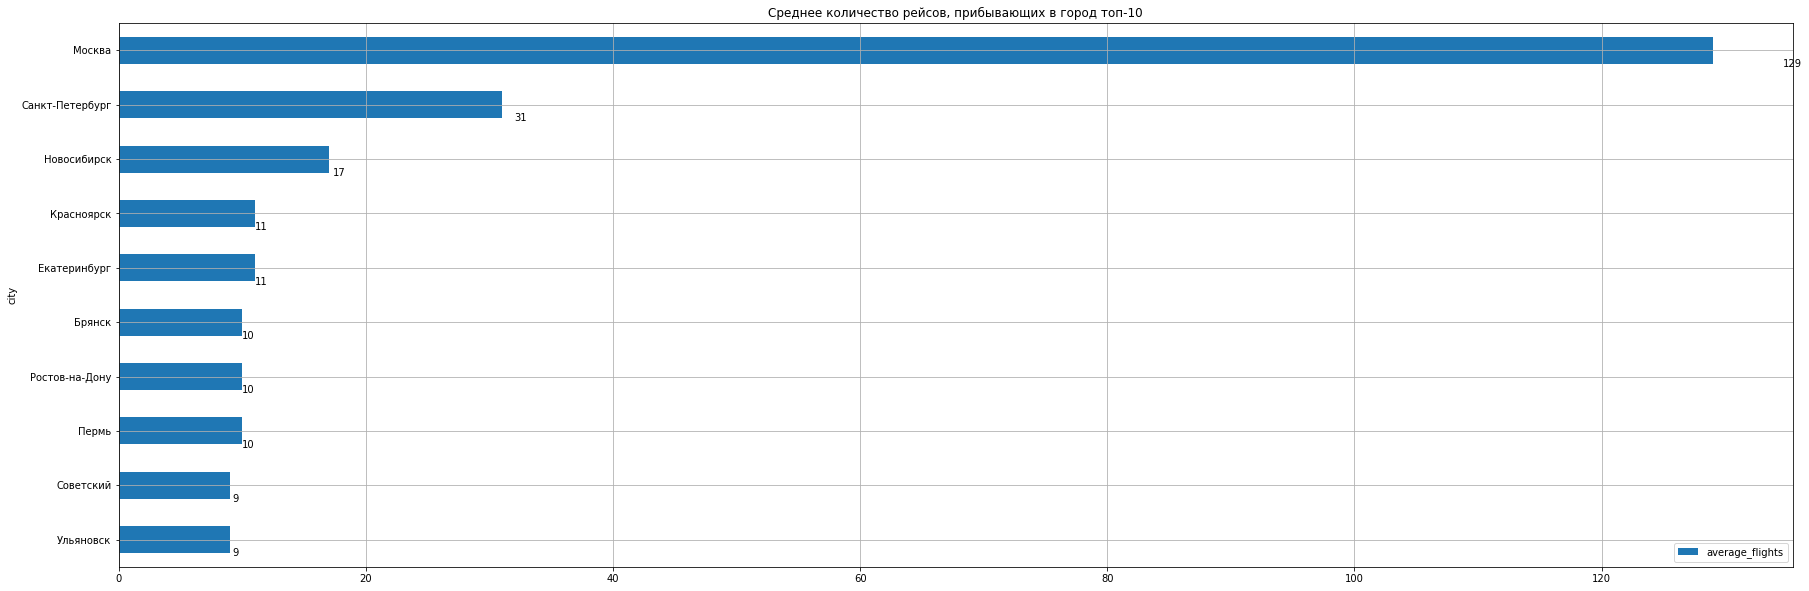

In [9]:
plot_city_top_10 = df_city_top_10.sort_values(by = 'average_flights', ascending = True)\
                    .plot.barh( x = 'city', y = 'average_flights',figsize = (30,10),
                    title='Среднее количество рейсов, прибывающих в город топ-10', grid=True)
for rect in plot_city_top_10.patches:
       plot_city_top_10.text(rect.get_width()*1.05, rect.get_y(), rect.get_width(), ha='center', va='center') 

plt.show()

В топ-10 вошла Москва. В августе люди сюда прилетают, чтобы совершить пересадку и полететь в отпуск, чтобы посетить интересные мероприятия или на учёбу в университеты.

Сантк-Петербург значительно отстаёт по количеству прилётов от Москвы, так как тут всего один аэропорт. Но в августе сюда тажке тянутся люди, чтобы посетить фестивали, приехать на учёбу или просто посетить Северную столицу России.

Далее идут крупные города-миллионники, Новосибирск, Красноярск, Екатеринбург. Рядом с этими городами не так много крупных аэропортов, поэтому пассажирам проще долететь до них, а дальше другим транспортом добраться до более мелких населённых пунктов.

Замыкают десятку небольшие города, являющиеся областными центрами. Оттуда люди также могут добираться до других регионов. Также в этих городах развита промышленность.

### Общий вывод
<a id='step_6'></a>

В нашей стране авиакомпании совершают много перелётов в Москву. Это направление всегда востребовано: туристические путешествия, рабочие визиты, транзитные перелёты. 

В Санкт-Петербург летает меньше самолётов, не смотря на то, что тут также много университетов, событий и крупных предприятий. Можно было бы увеличить количество перелётов из регионов в Северную столицу, они будут окупаться. 

Удобной опцией были бы перелёты из региона в регион хотя бы пару раз в неделю на небольших самолётах.